In [7]:
from fbprophet import Prophet
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




%matplotlib inline




#data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Time_predictions_on_all_columns\\'
#fa = pd.read_csv(data_path)
#entire_dataset = pd.read_csv(data_path2)

In [8]:
def pick_your_poison(number):
    if (number == 1):
        df = pd.read_csv("C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\cbt.csv")
        print("You picked cbt.csv")
    if (number == 2):
        df = pd.read_csv("C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv")
        print("You picked overall data")
    if (number == 3):
        df = pd.read_csv("C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv")
        df = df[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']]
        print("The five attributes")
    else:
        df = []
        print("No dataset for you")
    return df
    

In [9]:
def time_set(df):
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]])
    df.set_index(df.columns[0], inplace=True)
    return df

In [17]:
#p = Prophet(weekly_seasonality=True, seasonality_mode='multiplicative', growth = "linear")

#def semester(ds):
   # date = pd.to_datetime(ds)
   # return ((date.month >= 8 or date.month < 12) and (date.month >= 1 or date.month < 5))







def timepredictionLog(df,csvfilename):
    p = Prophet(weekly_seasonality=True, changepoint_prior_scale=0.8)
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    df['y'] = df['y'] + 1
    df['y'] = np.log(df['y'])
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df['y'] = np.exp(df['y'])-1
    #time_pred[time_pred.columns[1:]] = np.exp(time_pred[time_pred.columns[1:]])
    time_pred['yhat'] = np.exp(time_pred['yhat'])-1
    df1 = time_pred[['ds','yhat']]
    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [19]:
def timeprediction123(df,csvfilename):
    p = Prophet(weekly_seasonality=True,changepoint_prior_scale=0.8)
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    df1 = time_pred[['ds','yhat']]
    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [64]:
h = timeprediction123(fa)[2]

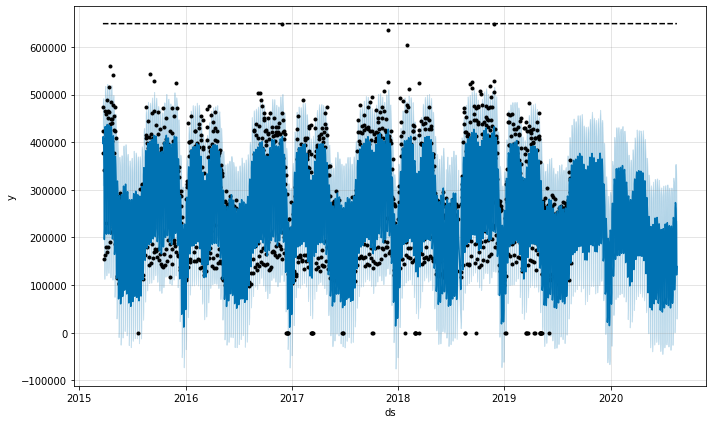

In [65]:
fig1 = p.plot(h)

In [ ]:
#p = Prophet(weekly_seasonality=True)

p.plot_components(h)

In [226]:
ca = pick_your_poison(3)

The five attributes


In [227]:
ca = ca[['time','inbound_rejected_emails']]

In [91]:
e = timeprediction123(ca)[2]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
five_att = pick_your_poison(3)

The five attributes


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


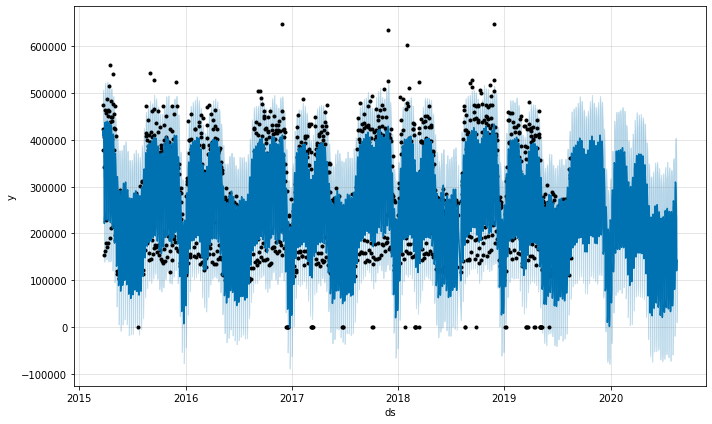

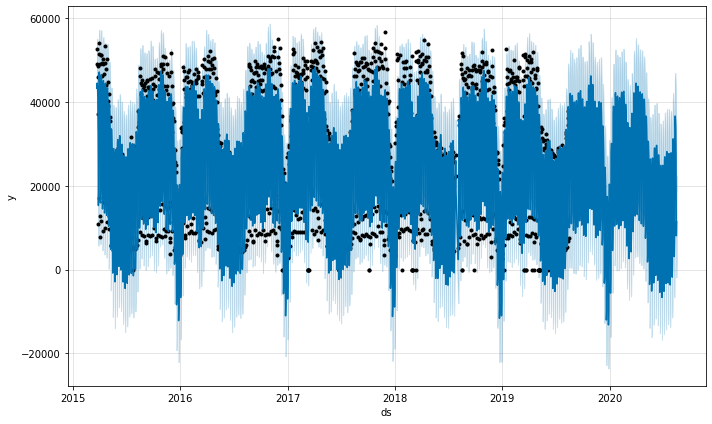

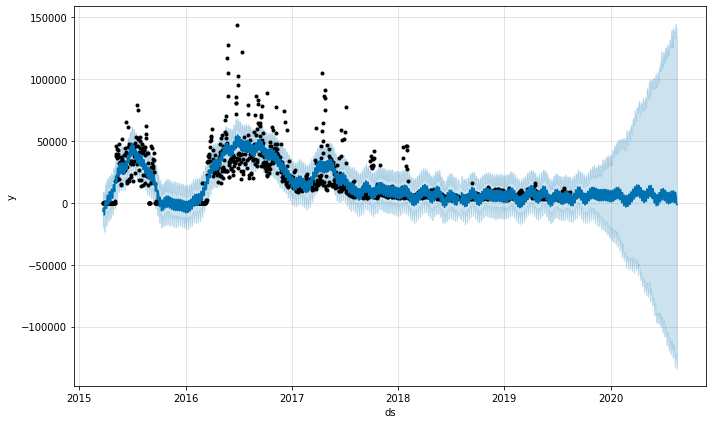

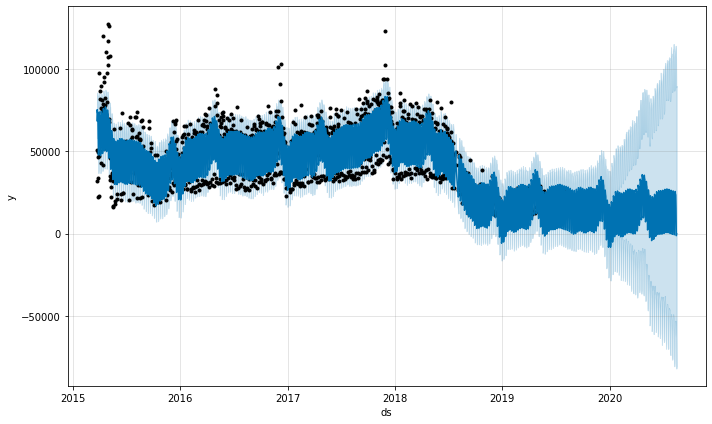

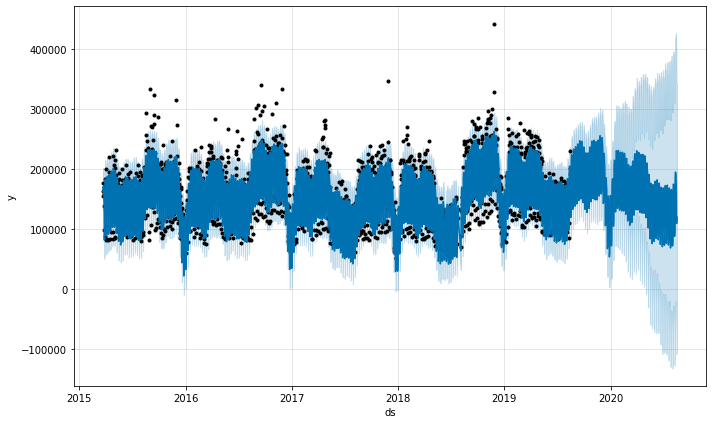

In [22]:
for x in range(len(five_att.columns) - 1):
    h =timeprediction123(df = five_att[['time', five_att.columns[x+1]]], csvfilename = five_att.columns[x+1] + '_time_prediction.csv')[0]
    h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : five_att.columns[x+1]})
    df_with_all_preds =  df_with_all_preds.merge(h, on = "time")

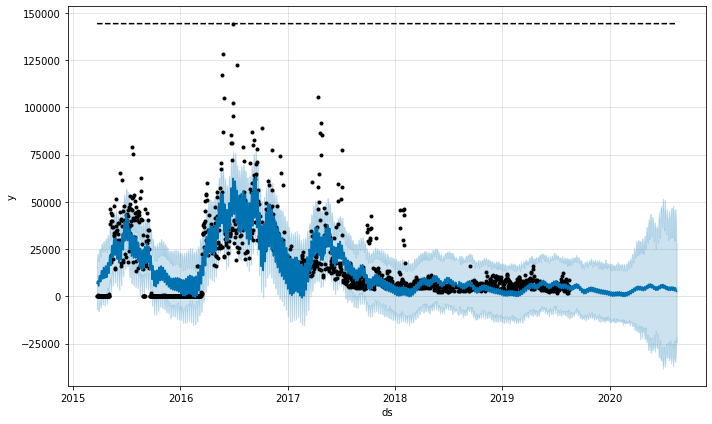

In [92]:
fig2 = p.plot(e)

In [93]:
e['yhat'].iloc[:1585]

0        6835.301430
1        7957.177743
2        8060.798648
3        8022.027058
4        7450.740065
5        5441.029202
6        5917.746915
7        9609.502685
8       10892.543709
9       10962.397463
10      10851.171532
11      10106.261822
12       7683.744596
13       8128.757872
14      12254.307206
15      13575.176801
16      13484.743619
17      13174.399532
18      12132.422156
19       9180.476533
20       9487.734780
21      13955.382711
22      15240.443308
23      14937.638442
24      14400.807322
25      13061.815848
26       9610.049946
27       9840.165776
28      14742.203860
29      16115.249772
            ...     
1555     6141.371411
1556     5514.113261
1557     4083.671252
1558     4144.011307
1559     6003.357455
1560     6478.085395
1561     6295.255317
1562     6035.713441
1563     5472.487167
1564     4099.974667
1565     4200.591608
1566     6080.144000
1567     6568.447552
1568     6389.113526
1569     5537.498362
1570     4137.441830
1571     4194

In [188]:
ca['inbound_rejected_emails']

0           2.0
1           6.0
2           6.0
3         790.0
4          13.0
5           6.0
6           9.0
7          10.0
8           6.0
9           1.0
10         26.0
11          2.0
12          1.0
13          1.0
14          1.0
15          8.0
16         69.0
17          4.0
18         17.0
19          2.0
20          3.0
21          5.0
22         18.0
23          3.0
24          8.0
25          6.0
26          1.0
27          0.0
28          5.0
29          7.0
         ...   
1555     7422.0
1556     9365.0
1557     4539.0
1558     5255.0
1559     5436.0
1560     6811.0
1561    11002.0
1562    12288.0
1563     7734.0
1564     3708.0
1565     2978.0
1566     4588.0
1567     6590.0
1568     8214.0
1569     6399.0
1570     4578.0
1571     7562.0
1572     9033.0
1573     6013.0
1574     5592.0
1575     6471.0
1576     3076.0
1577     1715.0
1578     1978.0
1579     3697.0
1580     3858.0
1581     3350.0
1582     5370.0
1583     8913.0
1584     5110.0
Name: inbound_rejected_e

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


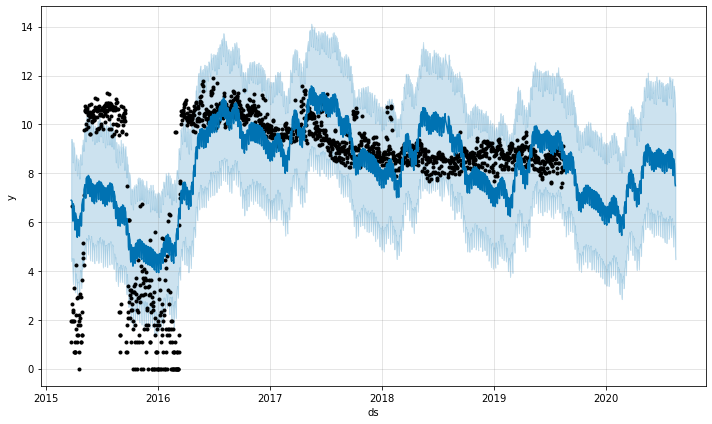

In [18]:
df_with_all_preds = timepredictionLog(df = five_att[['time', five_att.columns[1]]], csvfilename = five_att.columns[1] + '_time_prediction.csv')[0]
df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : five_att.columns[1]})
five_att= five_att.drop(columns= [five_att.columns[1]])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


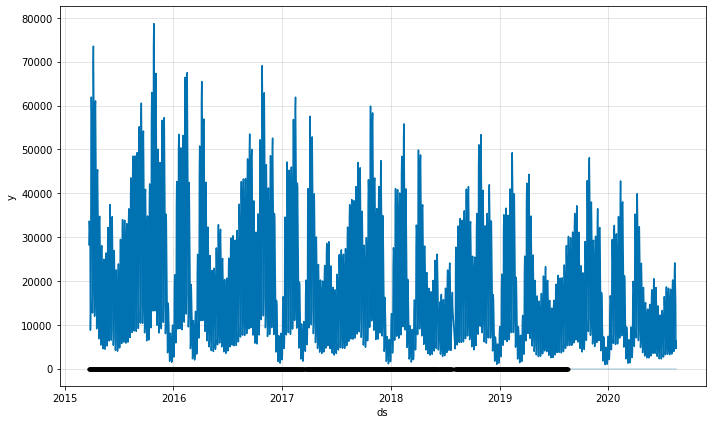

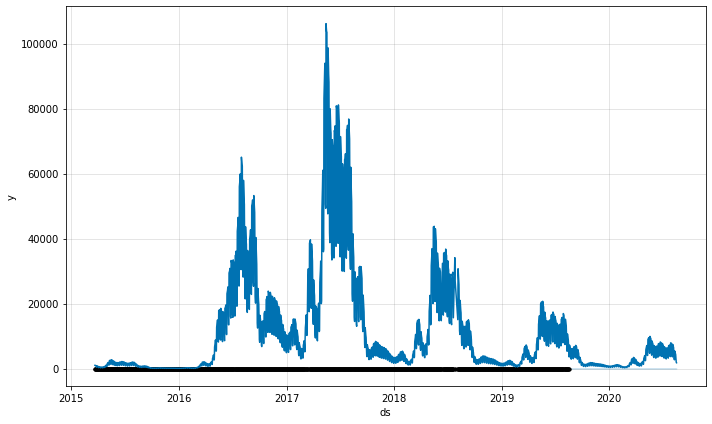

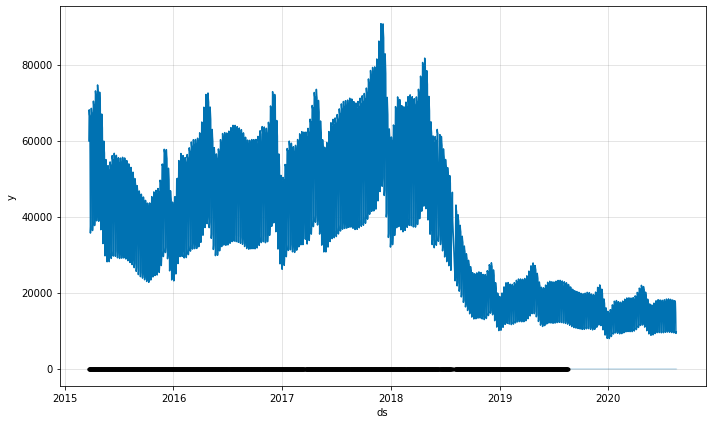

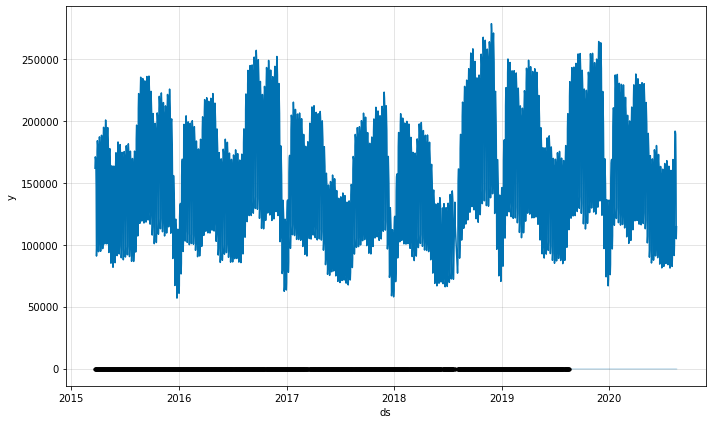

In [211]:
for x in range(len(five_att.columns) - 1):
    h =timeprediction123(df = five_att[['time', five_att.columns[x+1]]], csvfilename = five_att.columns[x+1] + '_time_prediction.csv')[0]
    h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : five_att.columns[x+1]})
    df_with_all_preds =  df_with_all_preds.merge(h, on = "time")

In [212]:
df_with_all_preds 

,time,emails_received,emails_sent,inbound_rejected_emails,inbound_spam_emails,inbound_non_spam_emails
0,2015-03-23,212385.782386,28247.464749,986.076063,59906.242209,161855.322202
1,2015-03-24,250832.667759,33618.599741,973.419198,68082.773047,171048.569149
2,2015-03-25,245917.346474,33222.504226,955.565568,66841.399934,169715.489721
3,2015-03-26,239432.706448,31137.832939,946.586967,66388.998487,166612.733990
4,2015-03-27,226310.860412,27275.759054,725.568525,56321.421806,145976.136855
5,2015-03-28,143737.251380,8756.895117,453.802233,35660.646524,90903.748547
6,2015-03-29,184075.858715,13120.255342,417.578179,37368.214578,98502.049413
7,2015-03-30,443933.393351,54470.920306,850.771886,60067.083554,175679.060256
8,2015-03-31,504886.192987,61913.319289,797.481244,68476.813730,184083.773860
9,2015-04-01,473251.049802,58033.890277,747.305867,67440.648285,181029.599196


In [213]:
heyman = time_set(df_with_all_preds)

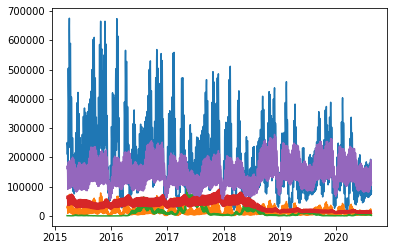

In [214]:
plt.plot(heyman)

In [215]:
df_with_all_preds.max()

emails_received            675874.538059
emails_sent                 78673.429407
inbound_rejected_emails    106130.301923
inbound_spam_emails         90762.786258
inbound_non_spam_emails    278690.892068
dtype: float64

In [216]:
df_with_all_preds.min()

emails_received            16368.246620
emails_sent                  903.888801
inbound_rejected_emails       49.845602
inbound_spam_emails         7903.073351
inbound_non_spam_emails    56924.396385
dtype: float64

In [198]:
def timeprediction12(df):
    p = Prophet(weekly_seasonality=True)
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    df['y'] = df['y'] + 1
    df['y'] = np.log(df['y'])
    #get forecast

    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    time_pred = p.predict(future)
    time_pred[time_pred.columns[1:]] = np.exp(time_pred[time_pred.columns[1:]]) - 1
    #time_pred['yhat'] = np.exp(time_pred['yhat'])-1 
    df1 = time_pred[['ds','yhat']]
    
    #df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    p.plot(time_pred)
    return df1,df2,time_pred

In [199]:
five_att1 = pd.read_csv(data_path2)
five_att1= five_att1[['time','emails_received','emails_sent','inbound_rejected_emails','inbound_spam_emails','inbound_non_spam_emails']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


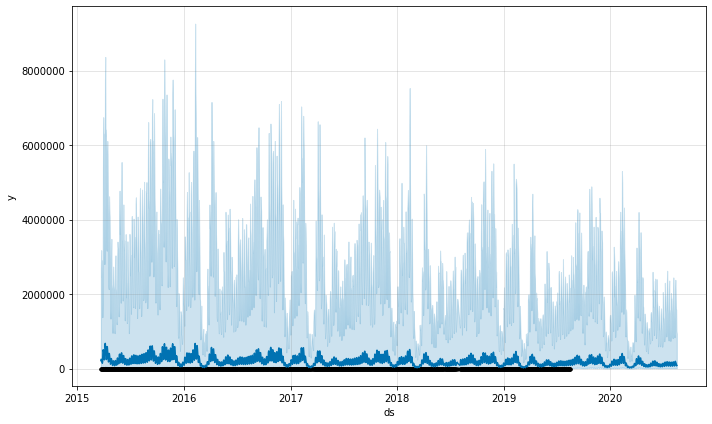

In [200]:
shid = timeprediction12(five_att1[['time','emails_received']])[2]

In [205]:
shid[['ds','yhat']]

,ds,yhat
0,2015-03-23,212385.782386
1,2015-03-24,250832.667759
2,2015-03-25,245917.346474
3,2015-03-26,239432.706448
4,2015-03-27,226310.860412
5,2015-03-28,143737.251380
6,2015-03-29,184075.858715
7,2015-03-30,443933.393351
8,2015-03-31,504886.192987
9,2015-04-01,473251.049802


In [207]:
five_att1[['time','emails_received']]

,time,emails_received
0,2015-03-23 00:00:00-04:00,474483.0
1,2015-03-24 00:00:00-04:00,378195.0
2,2015-03-25 00:00:00-04:00,423666.0
3,2015-03-26 00:00:00-04:00,405663.0
4,2015-03-27 00:00:00-04:00,342226.0
5,2015-03-28 00:00:00-04:00,154766.0
6,2015-03-29 00:00:00-04:00,162389.0
7,2015-03-30 00:00:00-04:00,407661.0
8,2015-03-31 00:00:00-04:00,465110.0
9,2015-04-01 00:00:00-04:00,458547.0
